In [12]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plot
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape

In [13]:
#task 1 - imager generation
mnist = pandas.read_csv('/home/anatoliy/fashion-mnist_train.csv')
x_train = mnist.drop('label',axis=1)
x_train=x_train.values
x_train=x_train.reshape(-1,28,28,1)
print(x_train.shape)

(60000, 28, 28, 1)


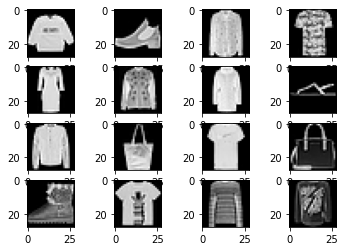

In [15]:
fig,axe=plot.subplots(4,4)
idx = 0

for i in range(4):
    for j in range(4):
        axe[i,j].imshow(x_train[idx].reshape(28,28),cmap='gray')
        idx+=1

In [16]:
x_train = x_train.astype('float32')
x_train = x_train/255
x_train = x_train*2 - 1.
mod_gen = Sequential()
mod_gen.add(Dense(512,input_shape=[100]))
mod_gen.add(LeakyReLU(alpha=0.2))
mod_gen.add(BatchNormalization(momentum=0.8))
mod_gen.add(Dense(256))
mod_gen.add(LeakyReLU(alpha=0.2))
mod_gen.add(BatchNormalization(momentum=0.8))
mod_gen.add(Dense(128))
mod_gen.add(LeakyReLU(alpha=0.2))
mod_gen.add(BatchNormalization(momentum=0.8))
mod_gen.add(Dense(784))
mod_gen.add(Reshape([28,28,1]))

In [17]:
mod_disc = Sequential()
mod_disc.add(Dense(1,input_shape=[28,28,1]))
mod_disc.add(Flatten())
mod_disc.add(Dense(256))
mod_disc.add(LeakyReLU(alpha=0.2))
mod_disc.add(Dropout(0.5))
mod_disc.add(Dense(128))
mod_disc.add(LeakyReLU(alpha=0.2))
mod_disc.add(Dropout(0.5))
mod_disc.add(Dense(64))
mod_disc.add(LeakyReLU(alpha=0.2))
mod_disc.add(Dropout(0.5))
mod_disc.add(Dense(1,activation='sigmoid'))

In [18]:
GAN =Sequential([mod_gen,mod_disc])
mod_disc.compile(optimizer='adam',loss='binary_crossentropy')
mod_disc.trainable = False
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [19]:
epochs = 100
batch_size = 64
noise_shape=100

Epoch 1
1/1 [==============================] - 0s 181ms/step


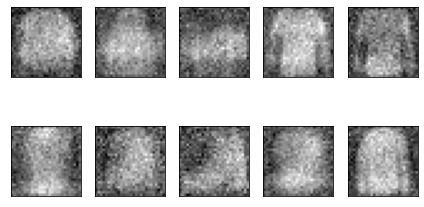

Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
1/1 [==============================] - 0s 33ms/step


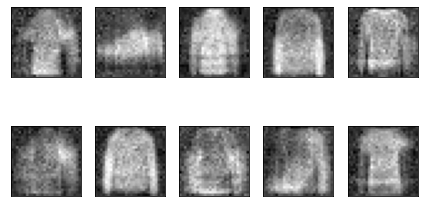

Epoch 12
Epoch 13
Epoch 14
Epoch 15


KeyboardInterrupt: 

In [22]:
for epoch in range(epochs):
    print(f"Epoch {epoch+1}")
    
    for i in range(x_train.shape[0]//batch_size):  
        
        noise=numpy.random.normal(0, 1, size=[batch_size,noise_shape])  
        generate_image = mod_gen.predict_on_batch(noise)   
        train_dataset = x_train[numpy.random.randint(0, x_train.shape[0], size=batch_size)]
        train_label=numpy.ones(shape=(batch_size,1))
        mod_disc.trainable = True
        d_loss_real=mod_disc.train_on_batch(train_dataset,train_label)
        train_label=numpy.zeros(shape=(batch_size,1))
        d_loss_fake=mod_disc.train_on_batch(generate_image,train_label)
        noise=numpy.random.normal(size=[batch_size,noise_shape])
        train_label=numpy.ones(shape=(batch_size,1))
        mod_disc.trainable = False
        d_g_loss_batch = GAN.train_on_batch(noise, train_label)   
        
    if epoch % 10 == 0:
        samples = 10
        x_fake = mod_gen.predict(numpy.random.normal(loc=0, scale=1, size=(samples, 100)))
        for n in range(samples):
            plot.subplot(2, 5, n+1)
            plot.imshow(x_fake[n].reshape(28, 28), cmap='gray')
            plot.xticks([])
            plot.yticks([])
        plot.tight_layout()
        plot.show()        
        
noise=numpy.random.normal(size=[10,noise_shape])
generate_image = mod_gen.predict(noise)

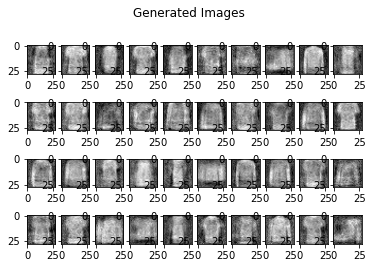

In [24]:
fig,axe=plot.subplots(4,10)
fig.suptitle('Generated Images')
idx=0
for i in range(4):
    for j in range(10):
         axe[i,j].imshow(generate_image[idx],cmap='gray')
         idx+=1